In [1]:
from IPython.display import Image, display

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
import matplotlib.pyplot as plt
from modulos.graficacion import plot_decision_regions
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'graphviz'

# Árboles de decisión

Los _árboles de decisión_ son algoritmos de Aprendizaje automático capaces de realizar tareas de clasificación y regresión. El algoritmo **CART** (_Classification and Regression Tree_) es el implementado por scikit-learn para el entrenamiento de los árboles de decisión. Este produce sólo _árboles binarios_

Los árboles resultantes son monotécnicos: árboles cuyas regiones de decisión están dadas por segmentos de rectas que siempre son perpendiculares a uno de los ejes de características.

### Algoritmo
El algoritmo de crecimiento de un árbol se puede expresar de la siguiente forma:

GenerarArbol(D):

- IF $y=1$ $\forall (x,y) \in D$ o $y=0$ $\forall (x,y) \in D$:
    - return arbol
- ELSE:
    - Seleccionar la mejor característica $x_j$:
        - $D_0$ en el nodo hijo 0: $x_j = 0$ $\forall (x,y) \in D$  
        - $D_1$ en el nodo hijo 1: $x_j = 1$ $\forall (x,y) \in D$  
    - return GenerarArbol($D_0$), GenerarArbol($D_1$)

### Criterio de División
¿Cómo hago para seleccionar la mejor característica? La idea es buscar una medida en cada nodo de modo que los datos en los nodos hijos sean lo más puros posibles.

La impureza está relacionada a la cantidad de instancias que corresponden a distintas clases en el nodo. Sea $I(N)$ la impureza en el nodo N:

- $I(N)$ será 0 si todas las instancias que están presentes en el nodo pertenecen a la misma clase.
- $I(N)$ será máxima si hay igual cantidad de instancias de cada clase.


Con el algoritmo de estos clasificadores, iniciamos en la raiz del árbol y dividimos los datos teniendo en cuenta la característica que resulte en la mayor ganancia de información (IG). Mediante este proceso, continúa dividiendo cada nodo hijo hasta llegar a nodos hojas puros (es decir las muestras en estos nodos pertenecen a una sola clase), no quedan más características para continuar dividiendo o no quedan más instancias.

Esto en la práctica puede dar como resultado árboles profundos con muchos nodos, lo cual facilmente lleva al sobreajuste. Por esta razón, se suele realizar una poda (prune) para limitar la profundidad del árbol.

### Ganancia de Información (IG)

Función objetivo que se busca maximizar al dividir un nodo.

$$IG(D_p,x_j)=I(D_P)-\sum\limits_{i=1}^{m}\frac{N_i}{N_p}I(D_i)$$

$x_j$: es la característica que se usa para hacer la división

$m$: opciones posibles de la característica

$D_p$ y  $D_i$: son los conjuntos de datos del nodo padre y el *i-èsimo* nodo hijo.

$I$: es la medida de impureza.

$N_p$: es el número total de muestras de entrenamiento en el nodo padre.

$N_i$: es el número de muestras en el *i-èsimo* nodo hijo.

> La ganancia de información es sólo la diferencia entre la impureza del nodo padre y la suma de las impurezas de los nodos hijos multiplicada por un factor de normalización. A menor impureza en los nodos hijos, mayor ganancia de información.

### Entropía (impureza de entropía)

$$H(t) = -\sum\limits_{i=1}^{c}p_i log_2(p_i)$$

### Impureza de Gini

$$G(t)=1-\sum\limits_{i=1}^{c}p_i^2$$

Siendo $p_i$ la proporción de muestras que pertenecen a la clase i para un nodo particular

$c$ es el número de clases

### Ejemplo con Dataset Iris

En el siguiente gráfico, tenemos las 3 clases Setosa, Versicolor y Virginica representadas mediante 2 características.

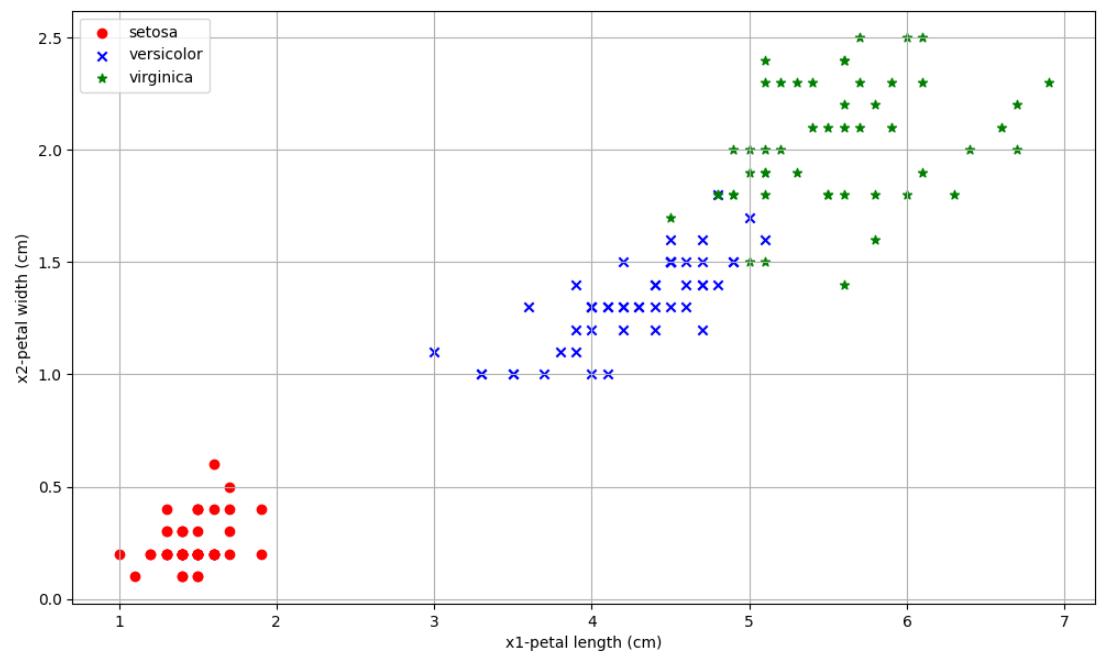

In [3]:
display(Image(filename='./2_imagenes/iris.png', width=1000))

Vamos a entrenar un árbol de decisión para separar estas 3 clases, el árbol tendrá una profundidad máxima de 2. En el siguiente enlace se encuentra la documentación de la clase [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

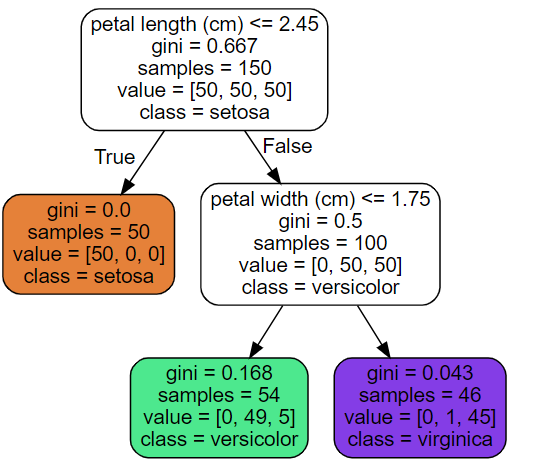

In [4]:
display(Image(filename='./2_imagenes/DT_iris_h2.png', width=500))

El árbol se puede graficar usando el método plot_tree del módulo [tree](https://scikit-learn.org/stable/api/sklearn.tree.html) de sklearn.

Alternativamente, puede usar el método [export_graphviz](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html)

Instalador:
https://www.graphviz.org/download/

Ahora vamos a visualizar la región de decisión resultante con este árbol de decisión

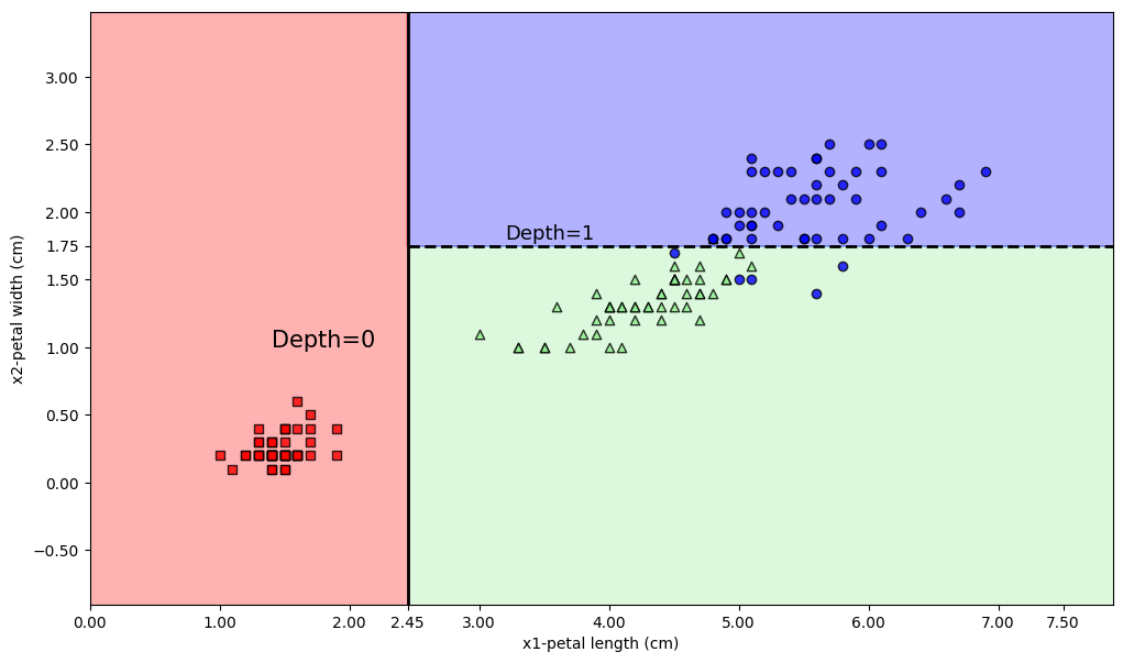

In [5]:
display(Image(filename='./2_imagenes/region_iris_h2.png', width=1000))

¿Qué sucede si limitamos la profundidad del árbol a 3?

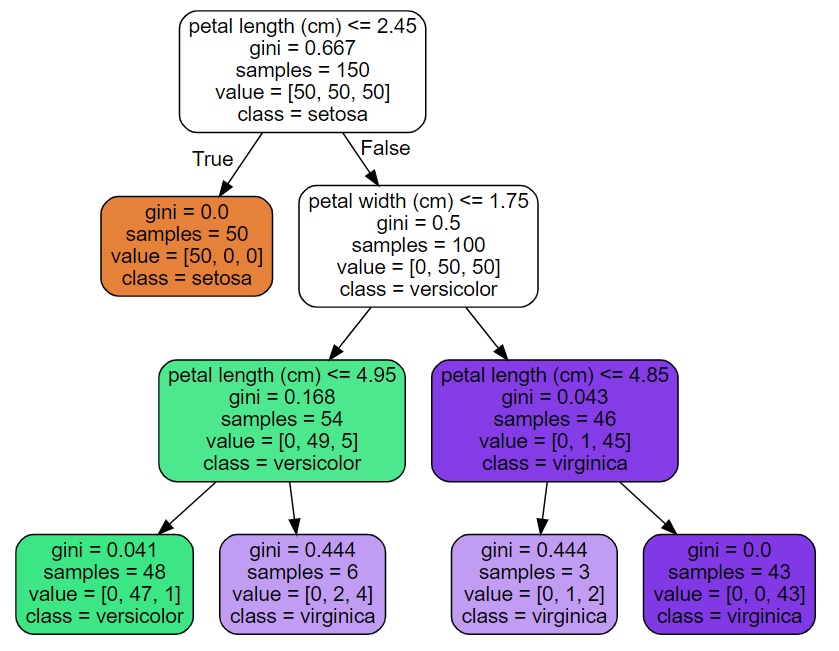

In [7]:
display(Image(filename='./2_imagenes/DT_iris_h3.png', width=700))

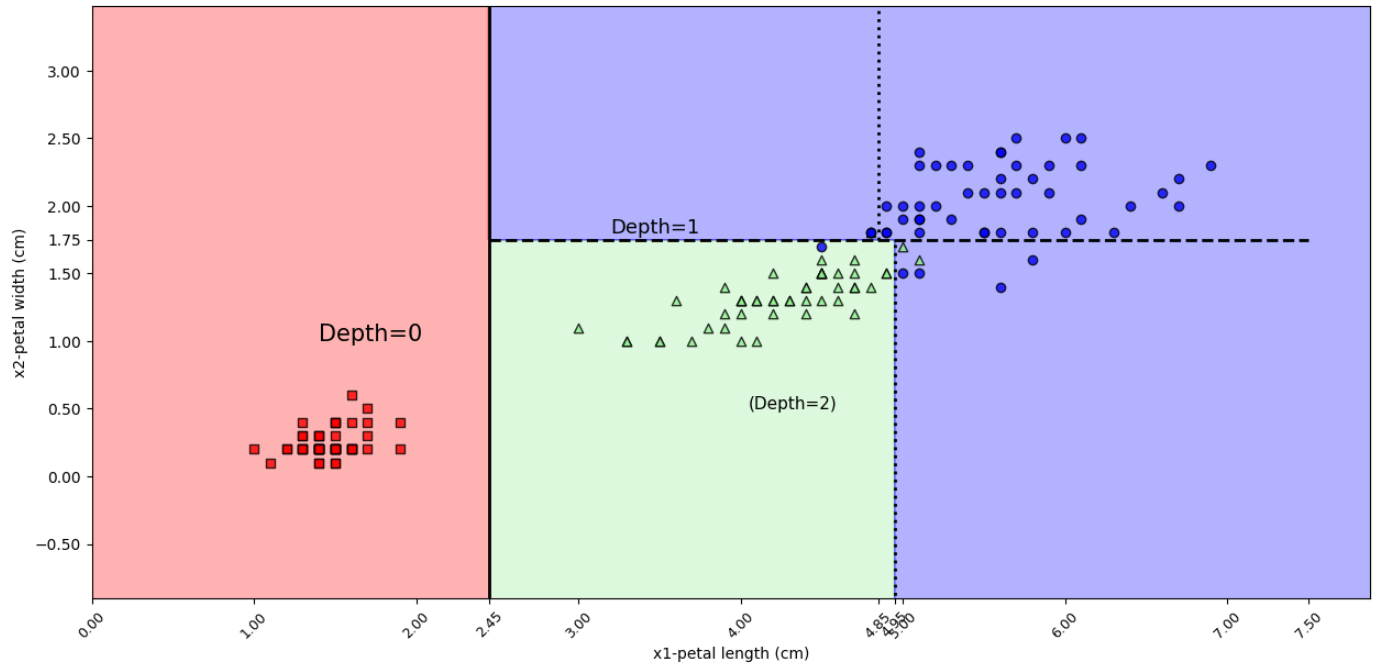

In [8]:
display(Image(filename='./2_imagenes/region_iris_h3.png', width=1300))

Para entender en profundidad como se selecciona la característica para dividir un nodo en el algoritmo. Vamos a resolver el siguiente ejemplo:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-c3ow">Edad</th>
    <th class="tg-c3ow">Le gustan los perros</th>
    <th class="tg-c3ow">Le gusta la gravedad</th>
    <th class="tg-c3ow">Será astronauta</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow">&lt;40</td>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">0</td>
  </tr>
  <tr>
    <td class="tg-c3ow">&lt;40</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">&lt;40</td>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">&lt;40</td>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">0</td>
  </tr>
  <tr>
    <td class="tg-baqh">&gt;40</td>
    <td class="tg-baqh">No</td>
    <td class="tg-baqh">No</td>
    <td class="tg-baqh">0</td>
  </tr>
  <tr>
    <td class="tg-c3ow">&gt;40</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">&gt;40</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">0</td>
  </tr>
  <tr>
    <td class="tg-c3ow">&gt;40</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">&gt;40</td>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">0</td>
  </tr>
  <tr>
    <td class="tg-c3ow">&gt;40</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">1</td>
  </tr>
</tbody>
</table>


### Ejercicio:

En la siguiente tabla se tienen datos acerca de la realización o suspensión de partidos de tenis en función del pronóstico del tiempo:


<table>
    <tbody>
        <tr>
            <td> </td>
            <td>Pronóstico</td>
            <td>Temperatura</td>
            <td>Humedad</td>
            <td>Viento</td>
            <td>Juega</td>
        </tr>
        <tr>
            <td>1</td><td>soleado</td><td>calor</td><td>alta</td><td>no</td><td>no</td>
        </tr>
        <tr>
            <td>2</td><td>soleado</td><td>calor</td><td>alta</td><td>si</td><td>no</td>
        </tr>
        <tr>
            <td>3</td><td>nublado</td><td>calor</td><td>alta</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>4</td><td>lluvioso</td><td>moderado</td><td>alta</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>5</td><td>lluvioso</td><td>frío</td><td>normal</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>6</td><td>lluvioso</td><td>frío</td><td>normal</td><td>si</td><td>no</td>
        </tr>
        <tr>
            <td>7</td><td>nublado</td><td>frío</td><td>normal</td><td>si</td><td>si</td>
        </tr>
        <tr>
            <td>8</td><td>soleado</td><td>moderado</td><td>alta</td><td>no</td><td>no</td>
        </tr>
        <tr>
            <td>9</td><td>soleado</td><td>frío</td><td>normal</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>10</td><td>lluvioso</td><td>moderado</td><td>normal</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>11</td><td>soleado</td><td>moderado</td><td>normal</td><td>si</td><td>si</td>
        </tr>
        <tr>
            <td>12</td><td>nublado</td><td>moderado</td><td>alta</td><td>si</td><td>si</td>
        </tr>
        <tr>
            <td>13</td><td>nublado</td><td>calor</td><td>normal</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>14</td><td>lluvioso</td><td>moderado</td><td>alta</td><td>si</td><td>no</td>
        </tr>
    </tbody>
</table>



1. Construya **a mano** **(haciendo todas las cuentas)** y dibuje a mano el árbol **binario** de decisión que describa los datos sobre juegos de tenis del cuadro.
Utilice la **impureza de entropía.**

2. Construya el árbol de decisión usando la clase `DecisionTreeClassifier`, para esto será necesario codificar los datos. Utilice `OneHotEncoder`. Los datos necesarios se encuentran en el archivo `play_tennis.csv`.

Compare el árbol obtenido a mano con el de scikit-learn. Son iguales?

['Pronóstico' 'Temperatura' 'Humedad' 'Viento']
['Pronóstico_lluvioso' 'Pronóstico_nublado' 'Pronóstico_soleado'
 'Temperatura_calor' 'Temperatura_frío' 'Temperatura_moderado'
 'Humedad_alta' 'Humedad_normal' 'Viento_no' 'Viento_si']


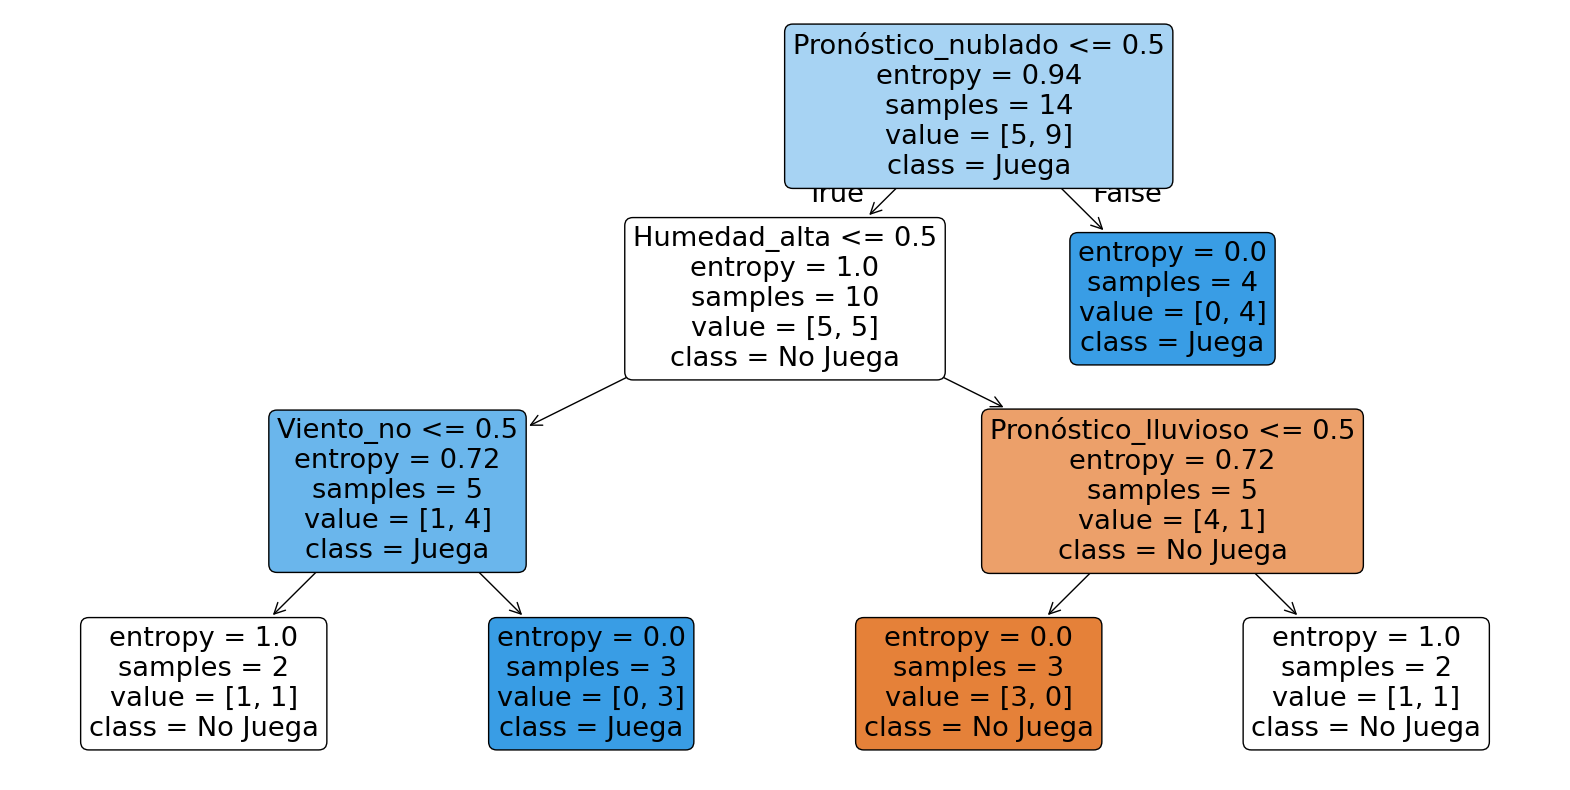

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Suponiendo que los datos están en un DataFrame llamado df
data = {
    'Pronóstico': ['soleado', 'soleado', 'nublado', 'lluvioso', 'lluvioso', 'lluvioso', 
                   'nublado', 'soleado', 'soleado', 'lluvioso', 'soleado', 'nublado', 
                   'nublado', 'lluvioso'],
    'Temperatura': ['calor', 'calor', 'calor', 'moderado', 'frío', 'frío', 'frío', 'moderado', 
                    'frío', 'moderado', 'moderado', 'moderado', 'calor', 'moderado'],
    'Humedad': ['alta', 'alta', 'alta', 'alta', 'normal', 'normal', 'normal', 'alta', 
                'normal', 'normal', 'normal', 'alta', 'normal', 'alta'],
    'Viento': ['no', 'si', 'no', 'no', 'no', 'si', 'si', 'no', 'no', 'no', 'si', 'si', 'no', 'si'],
    'Juega': ['no', 'no', 'si', 'si', 'si', 'no', 'si', 'no', 'si', 'si', 'si', 'si', 'si', 'no']
}

df = pd.DataFrame(data)
x = df.drop('Juega', axis=1)
y = df['Juega']

# tratar variabels categoricas
cat_encoder = OneHotEncoder()
x_train_cat_1hot = cat_encoder.fit_transform(x)
x_train_cat_1hot


x_train_cat_1hot.toarray() 

print(cat_encoder.feature_names_in_) #devuelve el nombre de la columna

print(cat_encoder.get_feature_names_out())
df2 = pd.DataFrame(x_train_cat_1hot.toarray(), columns=cat_encoder.get_feature_names_out())
# Dividir los datos
X = df2

# Crear y entrenar el modelo
tree = DecisionTreeClassifier(criterion='entropy',max_depth=3)
tree.fit(X, y)

# arbol
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['No Juega', 'Juega'], rounded=True, proportion=False, precision=2)
plt.show()

In [33]:
df2

,Pronóstico_lluvioso,Pronóstico_nublado,Pronóstico_soleado,Temperatura_calor,Temperatura_frío,Temperatura_moderado,Humedad_alta,Humedad_normal,Viento_no,Viento_si
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
